<a href="https://colab.research.google.com/github/dhahbimohamed/ml-zero-to-expert/blob/main/03_knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
#preprocess
df= df.drop(columns= ["tip","size","time"]) #drop unnecessary coulmns
label_cols = ["sex","smoker","day"]
le= LabelEncoder()
for col in label_cols:
  df[col]= le.fit_transform(df[col]) # convert categorical data into a numerical format

In [3]:
X = df.drop("smoker", axis = 1) #drop the smoker so the model can't cheat
y = df["smoker"]

# **What is KNN doing?**
KNN classifies a new point by looking at the ‘k’ closest examples (neighbors) in the training data and picking the most common label among them.

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# **How does changing k affect performance?**
Small k (like 1): model is very sensitive to noise, might overfit

Large k: smoother decisions but may underfit

There's a sweet spot (like k=3 or 5) that balances both

# **What does accuracy mean here?**
Accuracy = (correct predictions) / (total predictions)

It tells how well the model guessed smoker vs non-smoker on unseen data. But if the classes are imbalanced (e.g., 80% non-smokers), accuracy can mislead you. We Use the classification_report() to see precision/recall too.

In [6]:
print("accuarcy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuarcy: 0.6530612244897959
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        31
           1       0.56      0.28      0.37        18

    accuracy                           0.65        49
   macro avg       0.62      0.57      0.57        49
weighted avg       0.63      0.65      0.62        49



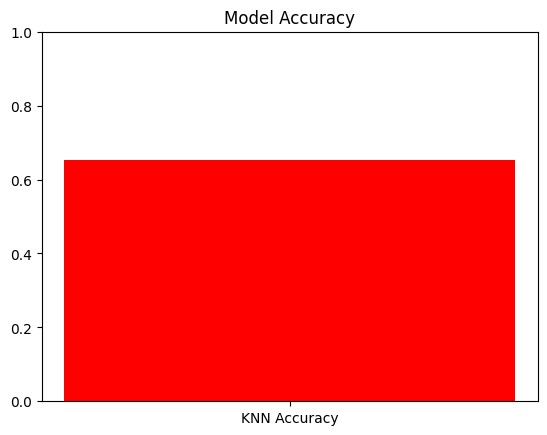

In [7]:
import matplotlib.pyplot as plt
acc = accuracy_score(y_test,y_pred)
plt.bar(["KNN Accuracy"],[acc],color='red')
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.show()

# **Main Hyperparameters:**
1. n_neighbors (default=5)
   - The number of neighbors to use for classification/regression.
   - Low value → high variance (overfitting)
   - High value → high bias (underfitting)

2. weights (default='uniform')
   - 'uniform': all neighbors have equal weight
   - 'distance': closer neighbors have more weight

3. algorithm (default='auto')
   - How to compute nearest neighbors:
     - 'ball_tree', 'kd_tree', 'brute', or 'auto'

4. leaf_size (default=30)
   - Affects speed of tree-based algorithms (BallTree, KDTree)

5. metric (default='minkowski')
   - Distance metric. Common choices:
     - 'euclidean', 'manhattan', 'chebyshev'
     - Use p=1 for manhattan, p=2 for euclidean

6. p (default=2)
   - Power parameter for Minkowski metric:
     - p = 1 → Manhattan
     - p = 2 → Euclidean
